In [96]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv('APY.csv')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [99]:
df.describe()

,Crop_Year,Area,Production,Yield
count,345336.000000,3.453360e+05,3.403880e+05,345336.000000
mean,2008.887512,1.167147e+04,9.584726e+05,79.423135
std,6.564361,4.584079e+04,2.153068e+07,916.678396
min,1997.000000,4.000000e-03,0.000000e+00,0.000000
25%,2003.000000,7.400000e+01,8.700000e+01,0.550000
50%,2009.000000,5.320000e+02,7.170000e+02,1.000000
75%,2015.000000,4.112000e+03,7.182000e+03,2.470000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


Observation:
In the yield column the 75th percentile value of 2.47 tonnes/hectare indicates that majority of yield data in the dataset is less than 3 tonnes/hectare. This creates expectation that yield values would typically be lower since we are measuring the amount of production per hectare.

In the Production column it appears that there may be some extreme values in the production column that are pullup mean value. Since mean production value is approximately 958,472 units, while the 75th percentile value is 7,182 units, it suggests that there might be a few instances with significantly higher production values that are skewing the average.

The data is covering the years from 1997 to 2020


In [100]:
import requests
import json
geojson_url= "https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

In this project, I aim to create interactive maps of India to explore and analyze various geographical data. To ensure accurate analysis and data consistency,  state names in the GeoJSON file with those in the dataset is aligned. This step is crucial in generating accurate and meaningful visual representations of the data, allowing us to gain valuable insights into India's diverse regions.

In [101]:
geojson_data


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[95.23391968067268, 26.68245856965871],
      [95.23282005383173, 26.705791937482644],
      [95.21038086477148, 26.73124215303452],
      [95.21647446882203, 26.755630964921654],
      [95.23108771748501, 26.765054996769667],
      [95.22916592824147, 26.785466234934876],
      [95.21476487961492, 26.7901109669967],
      [95.19731889611138, 26.82258347225182],
      [95.19804206866121, 26.838873109462586],
      [95.18153048666508, 26.86126527076989],
      [95.21486179974922, 26.883608420919657],
      [95.23026170400485, 26.883691279453185],
      [95.23190637286469, 26.919707474415166],
      [95.21216686467666, 26.930111922020178],
      [95.20211519185614, 26.958343043641676],
      [95.21140012293725, 26.965920877561512],
      [95.19149272591086, 26.98485697983234],
      [95.19716761622428, 27.001825910941804],
      [95.1946454837747, 27.031319394633655],
 

In [102]:
state_names=[]

for feature in geojson_data['features']:
    state_names.append(feature['properties']['ST_NM'])
    
state_names

['Arunachal Pradesh',
 'Assam',
 'Chandigarh',
 'Karnataka',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tripura',
 'Uttarakhand',
 'Telangana',
 'Bihar',
 'Kerala',
 'Madhya Pradesh',
 'Andaman & Nicobar',
 'Gujarat',
 'Lakshadweep',
 'Odisha',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Ladakh',
 'Jammu & Kashmir',
 'Chhattisgarh',
 'Delhi',
 'Goa',
 'Haryana',
 'Himachal Pradesh',
 'Jharkhand',
 'Tamil Nadu',
 'Uttar Pradesh',
 'West Bengal',
 'Andhra Pradesh',
 'Puducherry',
 'Maharashtra']

In [103]:
for state in df['State'].unique():
    if state not in state_names:
        print('state name not found',state)

state name not found Andaman and Nicobar Island
state name not found CHANDIGARH
state name not found Dadra and Nagar Haveli
state name not found Daman and Diu
state name not found Jammu and Kashmir
state name not found Laddak
state name not found THE DADRA AND NAGAR HAVELI


In order to address the multiple issues with the state names, the following steps will be taken:

Replace "and" with "&" in the state names.
Convert "CHANDIGARH" to lowercase for consistency.
Correct the misspelled state name "Laddak" to "Ladakh".
Merge "Dadra and Nagar Haveli" and "Daman and Diu" into a single region.

I can do it either in dataset (Microsoft Excel ) or in code. I have done it in code here 

In [104]:
print (df[df['State']== "Daman and Diu"].head())
print (df[df['State']== "Dadra and Nagar Haveli"].head())
       

               State District    Crop  Crop_Year       Season  Area   \
79806  Daman and Diu       DIU  Bajra       1998  Kharif       280.0   
79807  Daman and Diu       DIU  Bajra       1999  Kharif       280.0   
79808  Daman and Diu       DIU  Bajra       2000  Kharif       280.0   
79809  Daman and Diu       DIU  Bajra       2001  Kharif       280.0   
79810  Daman and Diu       DIU  Bajra       2002  Kharif       280.0   

       Production  Yield  
79806       397.0   1.42  
79807       341.0   1.22  
79808       558.0   1.99  
79809       218.0   0.78  
79810       216.0   0.77  
                        State               District        Crop  Crop_Year  \
79724  Dadra and Nagar Haveli  DADRA AND NAGAR HAVELI  Arhar/Tur       2015   
79725  Dadra and Nagar Haveli  DADRA AND NAGAR HAVELI  Arhar/Tur       2015   
79726  Dadra and Nagar Haveli  DADRA AND NAGAR HAVELI  Arhar/Tur       2016   
79727  Dadra and Nagar Haveli  DADRA AND NAGAR HAVELI  Arhar/Tur       2016   
79728  Dad

In [105]:
df['State'] = df['State'].str.replace(' and ', ' & ')
state_replacements = {
    'Andaman & Nicobar Island': 'Andaman & Nicobar',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'THE DADRA AND NAGAR HAVELI': 'Dadra and Nagar Haveli and Daman and Diu',
    'Laddak': 'Ladakh',
    'CHANDIGARH' :'Chandigarh'
}
df['State'] = df['State'].replace(state_replacements)
df['State']

0         Andaman & Nicobar
1         Andaman & Nicobar
2         Andaman & Nicobar
3         Andaman & Nicobar
4         Andaman & Nicobar
                ...        
345331          West Bengal
345332          West Bengal
345333          West Bengal
345334          West Bengal
345335          West Bengal
Name: State, Length: 345336, dtype: object

In [106]:
for state in df["State"].unique():
    if state not in state_names:
        print("State name not found:", state)

Examine and impute missing values

In [107]:
df.isnull().sum()

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64

In [108]:
df[df.Crop.isnull()]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
273741,Tamil Nadu,COIMBATORE,NaN,1998,Rabi,20.0,1.0,0.05
273742,Tamil Nadu,DINDIGUL,NaN,2002,Rabi,1.0,0.0,0.00
273743,Tamil Nadu,KRISHNAGIRI,NaN,2004,Rabi,1.0,NaN,0.00
273744,Tamil Nadu,NAMAKKAL,NaN,1998,Rabi,250.0,13.0,0.05
273745,Tamil Nadu,RAMANATHAPURAM,NaN,2006,Rabi,3.0,NaN,0.00
273746,Tamil Nadu,SALEM,NaN,1999,Rabi,25.0,12.0,0.48
273747,Tamil Nadu,THE NILGIRIS,NaN,1998,Rabi,430.0,20.0,0.05
273748,Tamil Nadu,TIRUPPUR,NaN,2011,Kharif,2.0,NaN,0.00
273749,Tamil Nadu,VELLORE,NaN,2006,Rabi,4.0,NaN,0.00


In [109]:
df.Crop.isnull().sum()/len(df)

np.float64(2.60615748140941e-05)

In [110]:
#The number of missing values for the "Crop" variable is relatively very small compared to the total number of records in the dataset, dropping those rows is a viable option

df.dropna(subset=['Crop'],inplace= True)

In [111]:
df.Production.isnull().sum()/len(df)

np.float64(0.014316864884587652)

The null values of Production is high so we calculate median of production to fill in null values to make dataset to give near to accurate analysis

In [112]:
production_median = df['Production'].median()
df['Production'].fillna(production_median)

0         3415.0
1         2277.0
2         3060.0
3         2660.0
4         3120.0
           ...  
345331    1241.0
345332    2415.0
345333    2145.0
345334    2114.0
345335     931.0
Name: Production, Length: 345327, dtype: float64

In [113]:
df.isnull().sum()

State            0
District         0
Crop             0
Crop_Year        0
Season           0
Area             0
Production    4944
Yield            0
dtype: int64

Visualization and Insights

In [114]:
df.columns

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

In [115]:
#categorical
cat = ['State', 'District ', 'Crop', 'Season']
#numerical
num = ['Crop_Year' ,'Area ', 'Production', 'Yield']

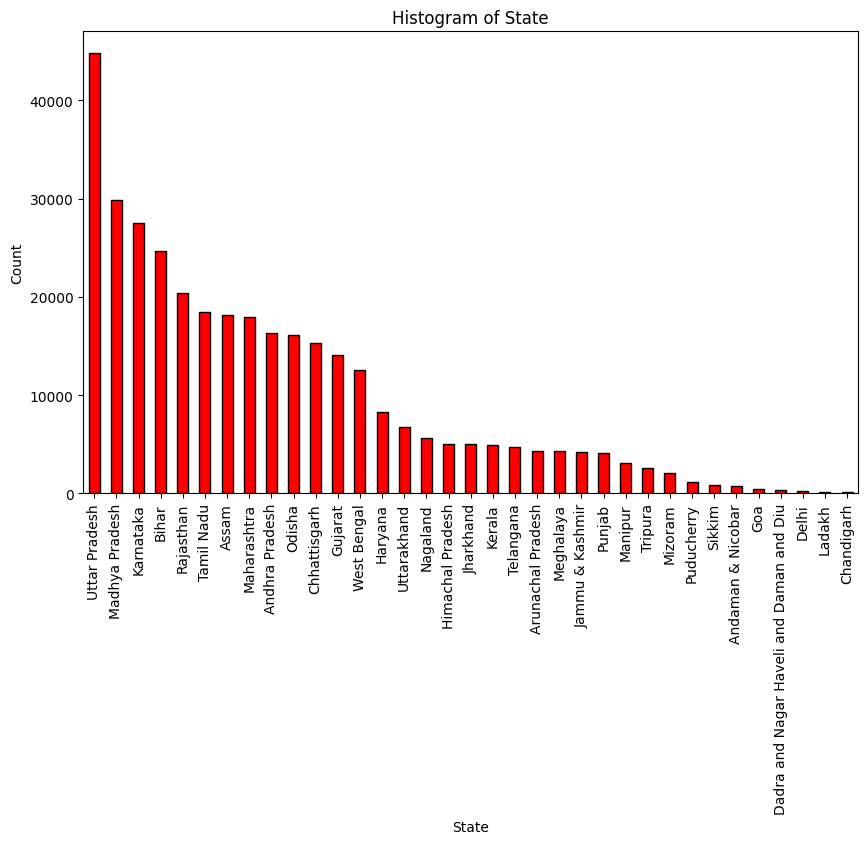

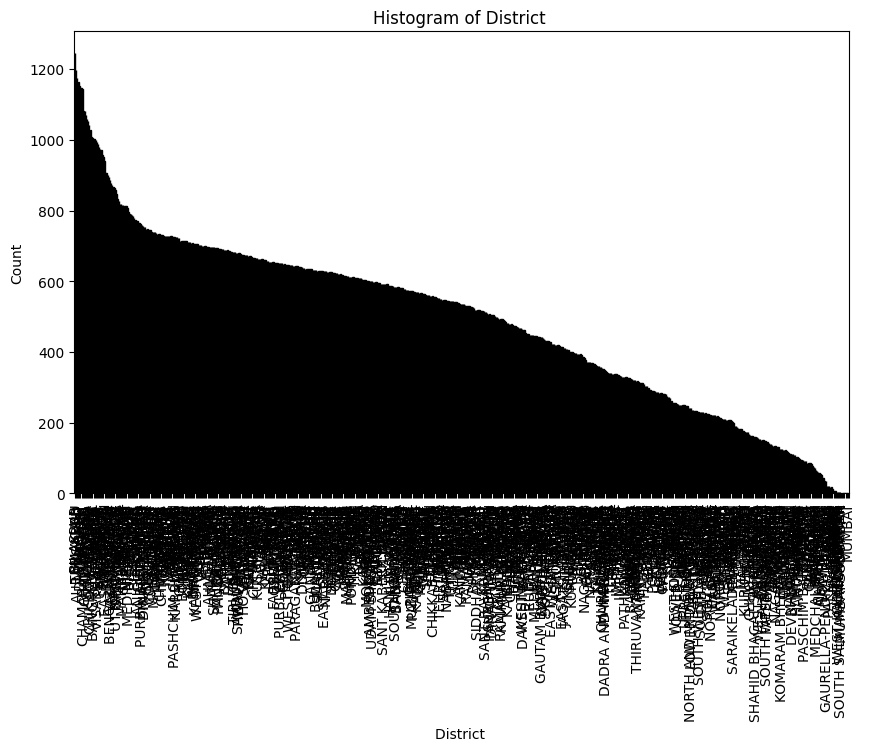

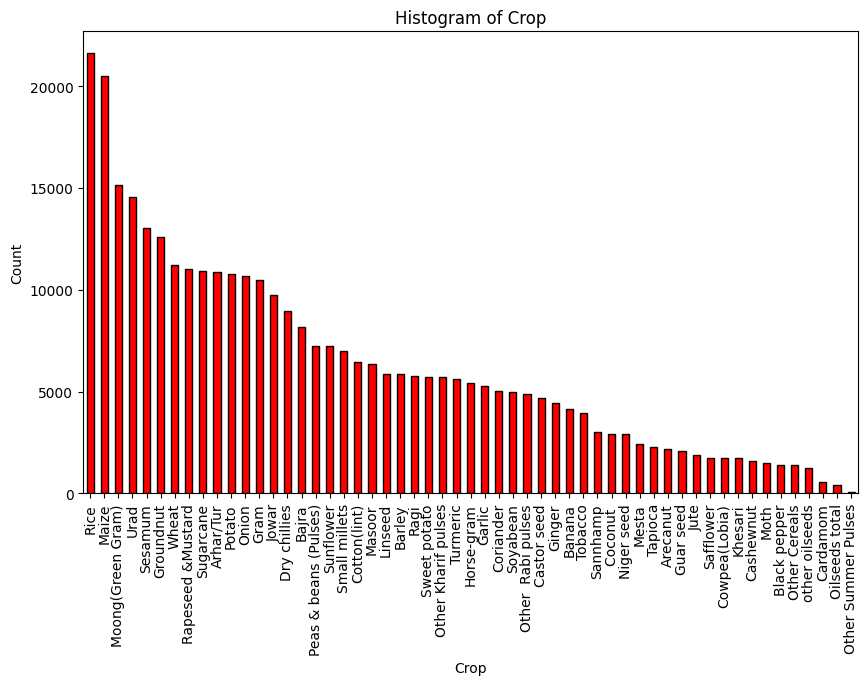

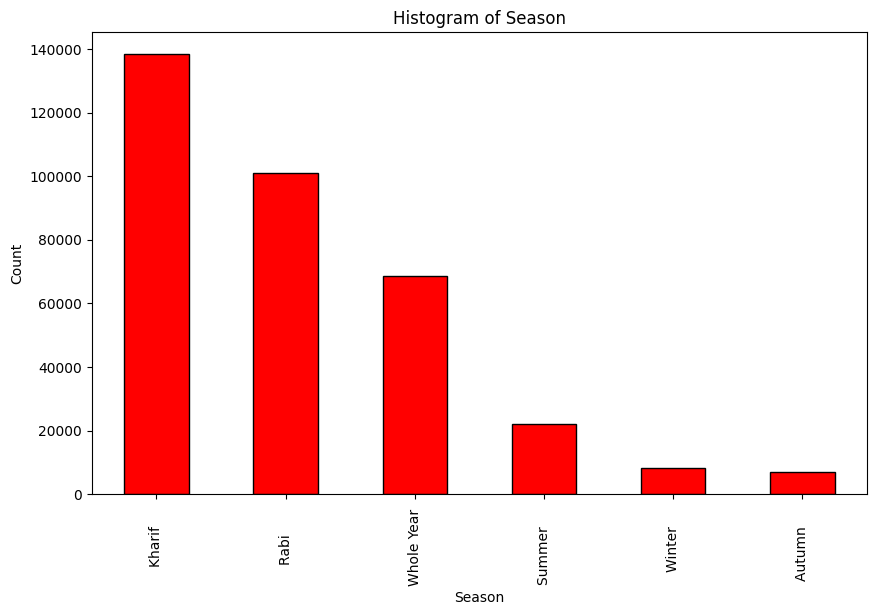

In [116]:
import matplotlib.pyplot as plt

for att in cat:
    # Plot histogram
    plt.figure(figsize=(10, 6))
    df[att].value_counts().plot(kind='bar', color='red', edgecolor='black')
    
    # Add title and labels
    plt.title(f'Histogram of {att}')
    plt.xlabel(att)
    plt.ylabel('Count')
    
    # Show plot
    plt.show()


Visualisation of district counts by state, will give an overview of how the districts are distributed across different states. This can help to identify states with a higher number of districts and states with fewer districts.

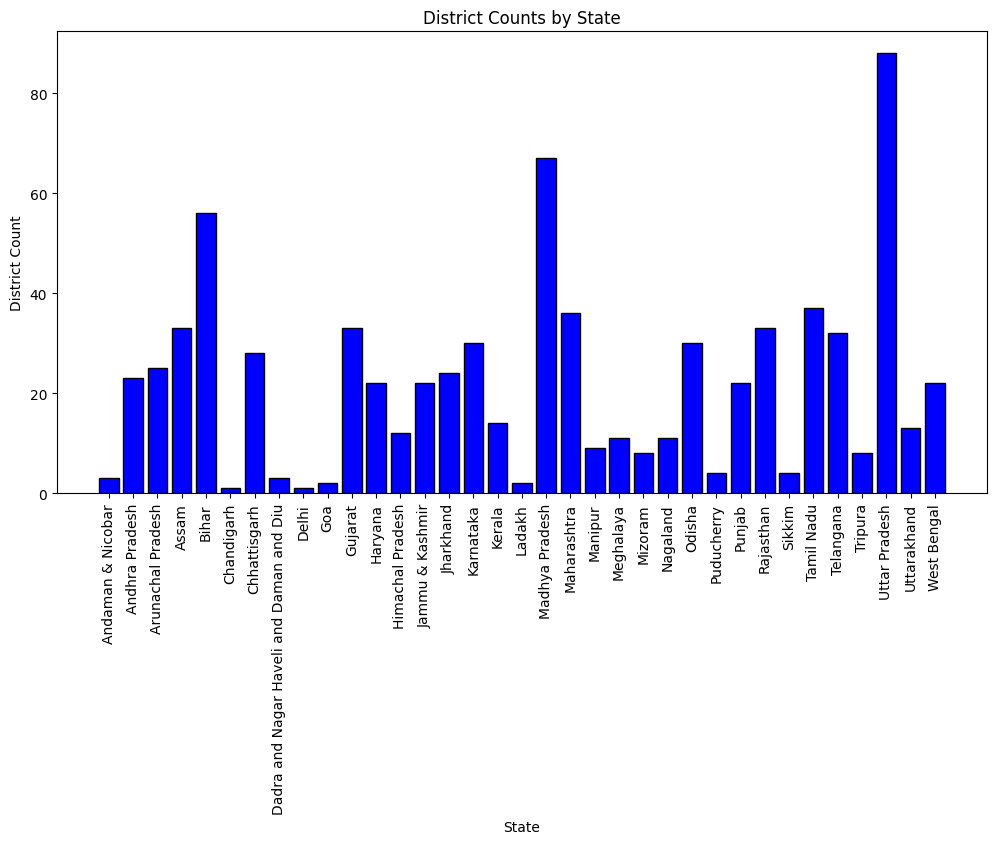

In [117]:
import matplotlib.pyplot as plt

state_counts = df.groupby('State')['District '].nunique().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(state_counts['State'], state_counts['District '], color='blue', edgecolor='black')
plt.title('District Counts by State')
plt.xlabel('State')
plt.ylabel('District Count')
plt.xticks(rotation=90)
plt.show()


Distributions of numerical attributes using histograms and box plots.

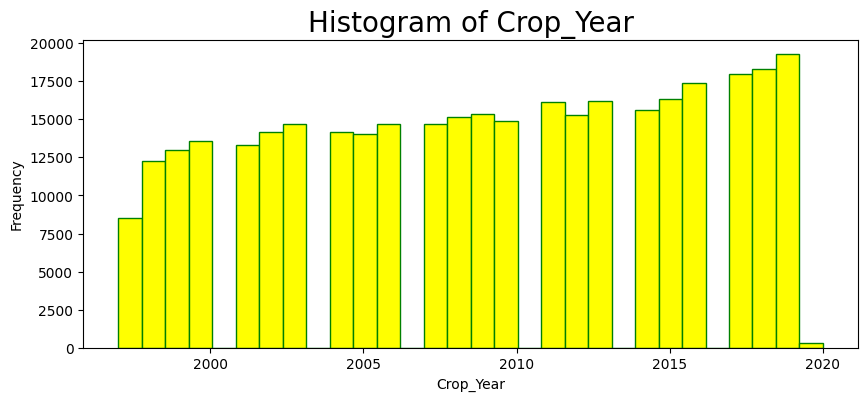

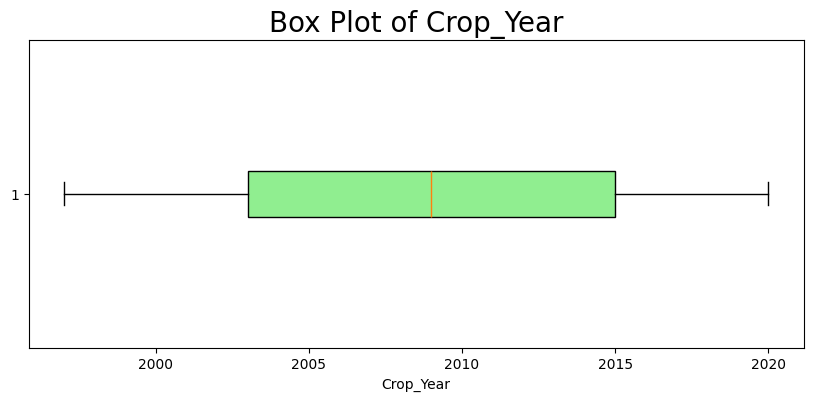

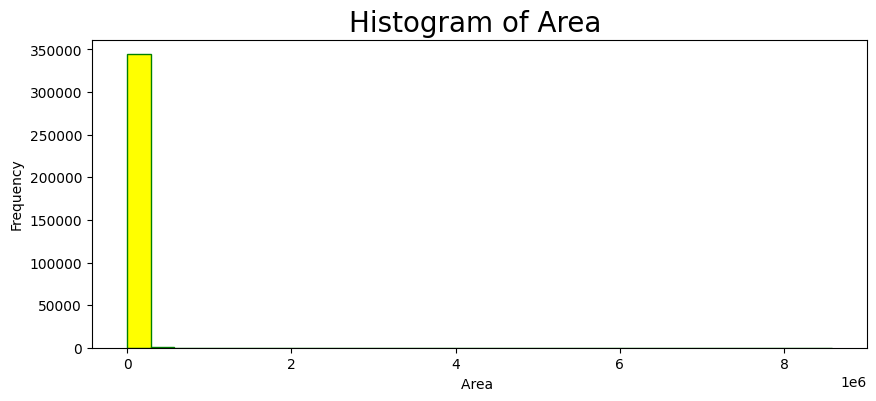

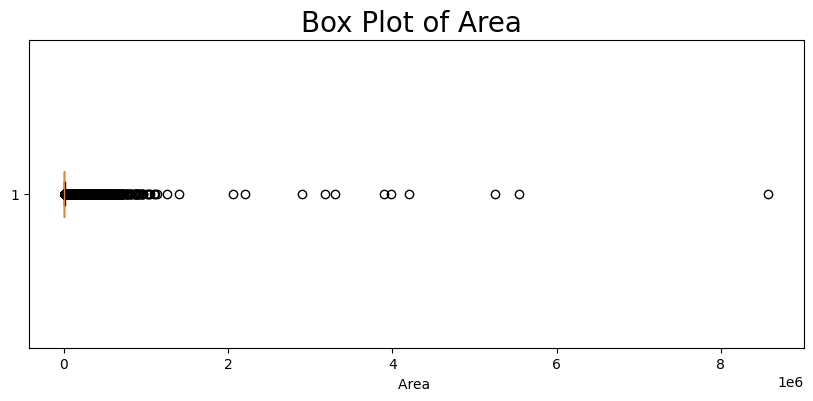

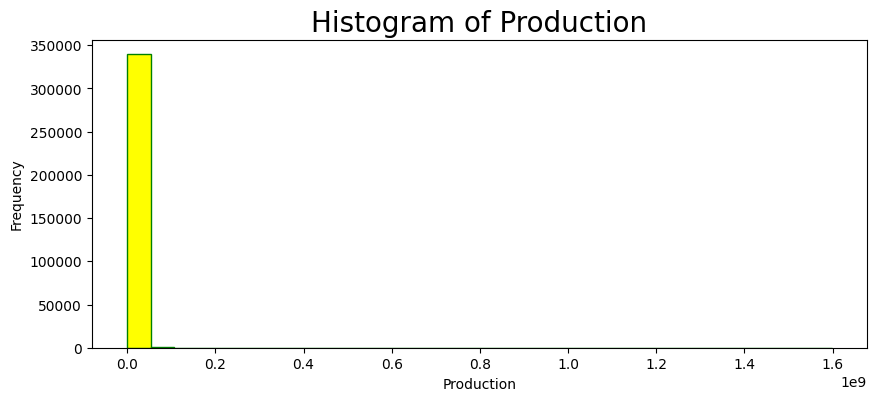

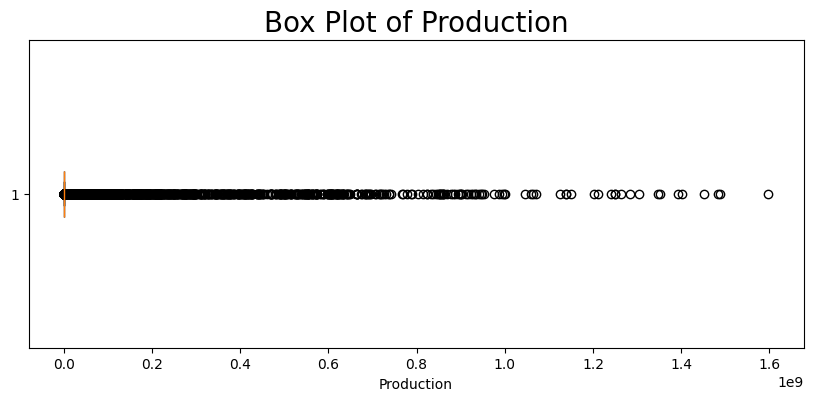

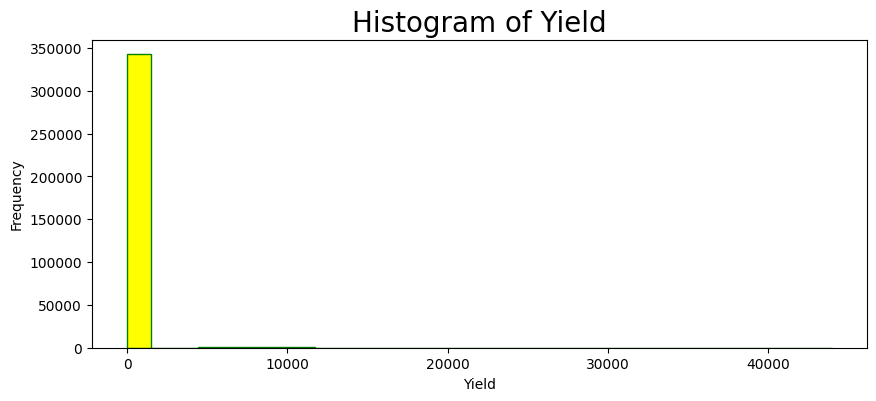

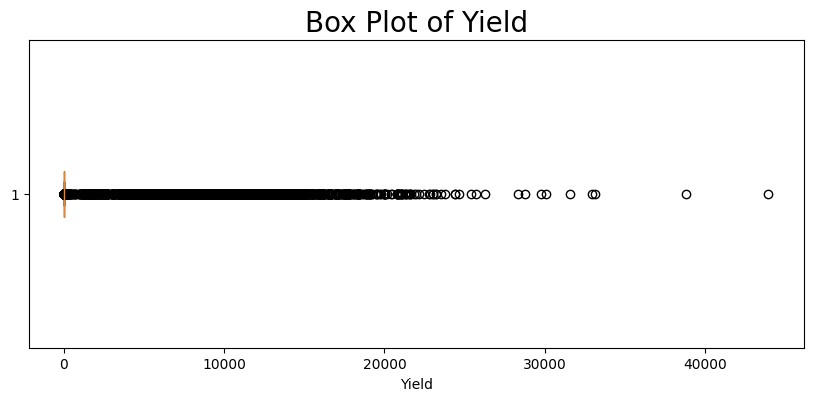

In [118]:
import matplotlib.pyplot as plt

for att in num:
    # Histogram
    plt.figure(figsize=(10, 4))
    plt.hist(df[att], bins=30, color='yellow', edgecolor='green')
    plt.title(f'Histogram of {att}', fontsize=20)
    plt.xlabel(att)
    plt.ylabel('Frequency')
    plt.show()
    
    # Box Plot
    plt.figure(figsize=(10, 4))
    plt.boxplot(df[att].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    plt.title(f'Box Plot of {att}', fontsize=20)
    plt.xlabel(att)
    plt.show()


General Analytics

Most commonly grown crops in each state

In [119]:
crop_counts = df.groupby(['State', 'Crop']).size().reset_index(name='Count')
max_indices = crop_counts.groupby('State')['Count'].idxmax()
most_common_crop = crop_counts.loc[max_indices].reset_index(drop=True)

most_common_crop


,State,Crop,Count
0,Andaman & Nicobar,Arecanut,51
1,Andhra Pradesh,Rice,893
2,Arunachal Pradesh,Maize,380
3,Assam,Rice,1756
4,Bihar,Maize,2579
5,Chandigarh,Rice,22
6,Chhattisgarh,Moong(Green Gram),800
7,Dadra and Nagar Haveli and Daman and Diu,Rice,63
8,Delhi,Bajra,22
9,Goa,Rice,70


In [ ]:
pip install geopandas

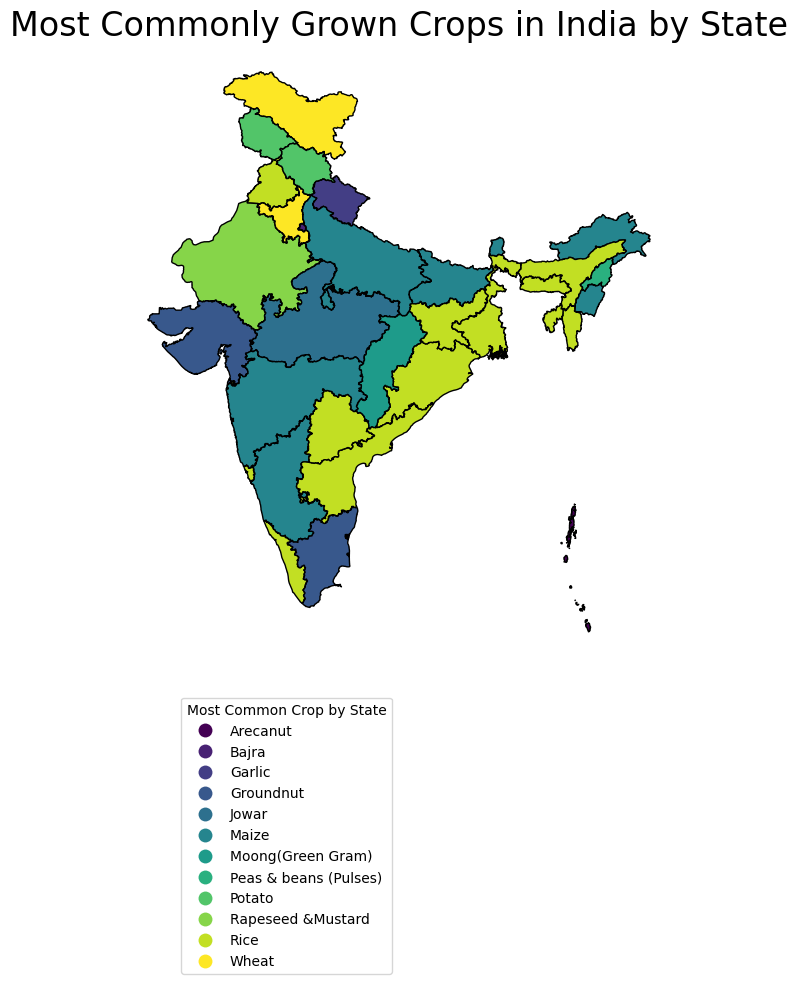

In [121]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file(geojson_url)
merged = gdf.set_index('ST_NM').join(most_common_crop.set_index('State'))

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the choropleth map
merged.plot(column='Crop', ax=ax, legend=True,
            cmap='viridis', edgecolor='black')

legend = ax.get_legend()
legend.set_title("Most Common Crop by State")
legend.set_bbox_to_anchor((0.5, -0.05))  # Adjust the position of the legend

ax.set_title('Most Commonly Grown Crops in India by State', fontsize=24)
ax.set_axis_off()

plt.show()


Highest crop production by season

In [122]:
season_production = df.groupby(['Crop', 'Season'])['Production'].sum().reset_index()
season_list =season_production.Season.unique()

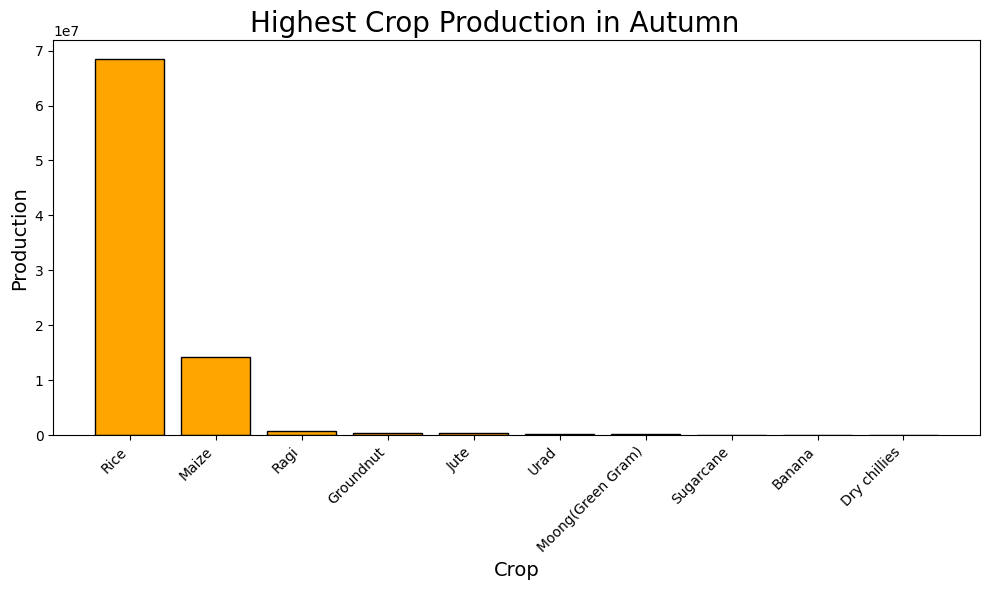

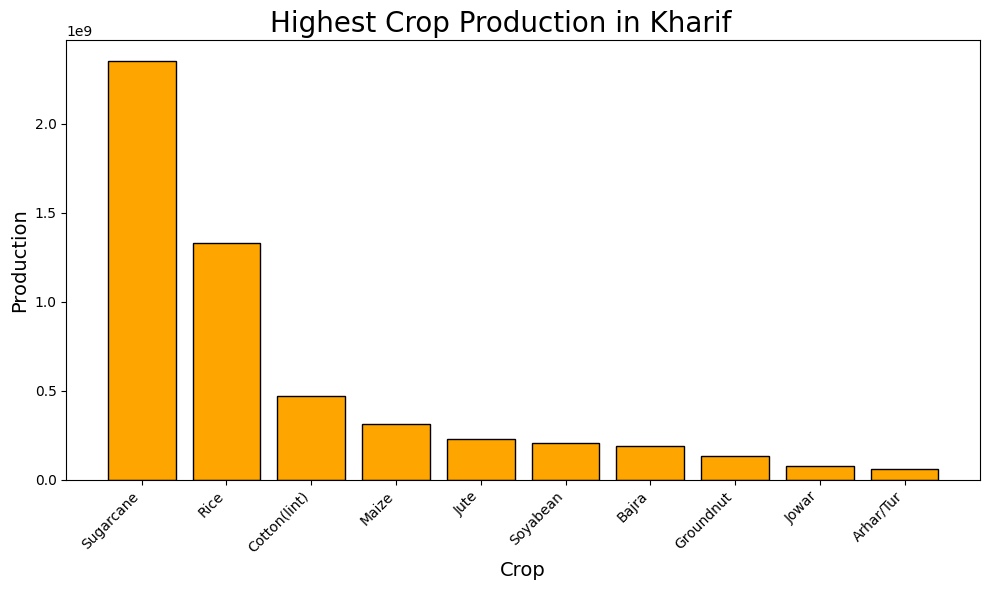

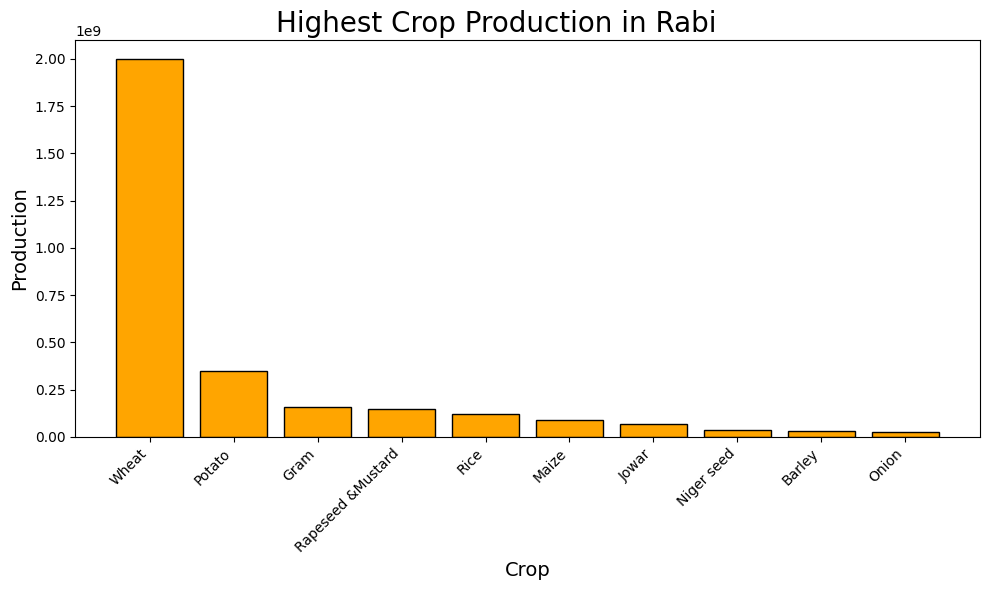

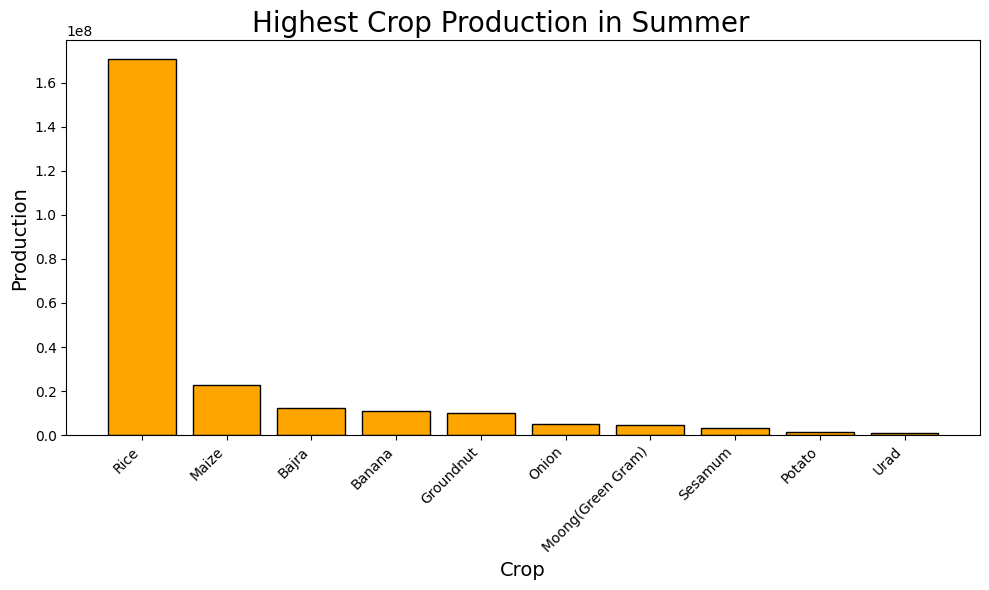

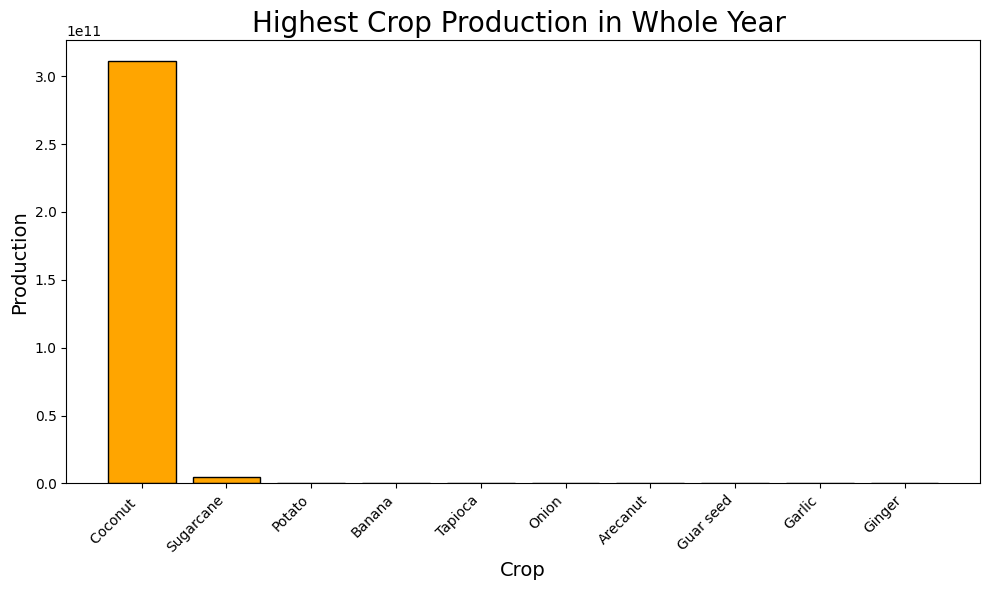

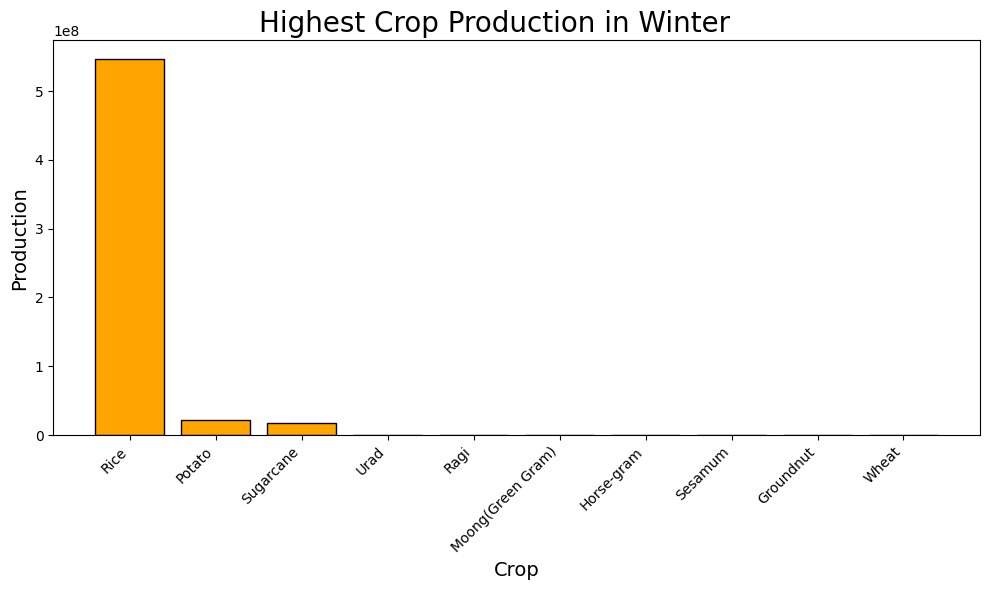

In [123]:
# Filter the data for the winter season
for i in season_list:
    mask = season_production[season_production.Season == i]
    mask = mask.sort_values('Production', ascending=False)
    top_crops = mask.head(10)
    plt.figure(figsize=(10, 6))
    plt.bar(top_crops['Crop'], top_crops['Production'], color='orange', edgecolor='black')
    plt.title(f'Highest Crop Production in {i}', fontsize=20)
    plt.xlabel('Crop', fontsize=14)
    plt.ylabel('Production', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
